# Admission vs (Exam 1 and Exam 2)
Here I predict if an student is admitted depending on his grades in two exams

In [1]:
#Load Modules
from pandas import read_csv
from numpy import ones, zeros, append, linspace, reshape, mean ,std, sum, array, dot, exp, meshgrid, rint
from pylab import plot, scatter, xlabel, ylabel, contour,figure, show, axes, legend, title
from scipy.optimize import fmin_bfgs
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Read data from file
dataFrame = read_csv('data/data3.txt', names = ['Exam 1','Exam 2','Acceptance'])
print dataFrame[:5]

      Exam 1     Exam 2  Acceptance
0  34.623660  78.024693           0
1  30.286711  43.894998           0
2  35.847409  72.902198           0
3  60.182599  86.308552           1
4  79.032736  75.344376           1


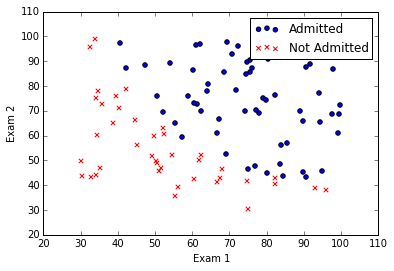

In [3]:
#Extract and plot data
x = dataFrame.as_matrix(columns = ['Exam 1','Exam 2'])
y = dataFrame.as_matrix(columns = ['Acceptance'])

pos = where(y==1)[0]
neg = where(y==0)[0]

scatter(x[pos,0],x[pos,1], marker = 'o', c = 'b')
scatter(x[neg,0],x[neg,1], marker = 'x', c = 'r')
xlabel('Exam 1')
ylabel('Exam 2')
legend(['Admitted','Not Admitted'])

m = x.shape[0]
n = x.shape[1]+1

#make initial theta as an array of 1D
inTheta = zeros(n)


In [4]:
#functions to be used

def normalizeData(x):
    mu = mean(x,axis=0)
    sigma = std(x,axis=0)
    x = (x-mu)/sigma
    x = append(ones((x.shape[0],1)),x,axis=1)
    return (x,mu,sigma)

def sigmoid(z):
    return 1/(1+exp(-z))

def costFunction(theta,x,y):
    theta = reshape(theta,(theta.size,1))
    pred = sigmoid(dot(x,theta))
    J = mean(-y*log(pred)-(1-y)*log(1-pred))
    return J

def gradient(theta,x,y):
    theta = reshape(theta,(theta.size,1))
    pred = sigmoid(dot(x,theta))
    grad = dot(x.T,pred-y)/m
    return grad.flatten()

def prediction(theta,x,mu=0,sigma=1):
    theta = reshape(theta,(theta.size,1))
    x.shape = (1,x.shape[0])
    x = (x-mu)/sigma
    x = append(ones((x.shape[0],1)),x,axis=1)
    pred = sigmoid(dot(x,theta))
    return pred

def accuracy(theta,x,y):
    theta = reshape(theta,(theta.size,1))
    pred = rint(sigmoid(dot(x,theta)))
    return sum(pred == y)/float(x.shape[0])*100

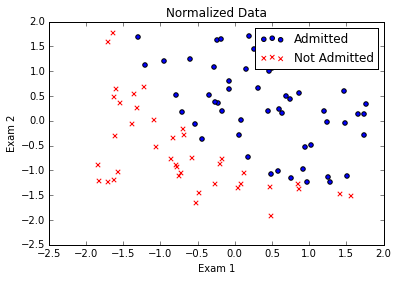

In [5]:
#Normalize data and plot it in a simple way
X,mu,sigma = normalizeData(x)
scatter(X[pos,1],X[pos,2], marker = 'o', c = 'b')
scatter(X[neg,1],X[neg,2], marker = 'x', c = 'r')
xlabel('Exam 1')
ylabel('Exam 2')
legend(['Admitted','Not Admitted'])
title('Normalized Data')

The optimize values for Theta are: [ 1.71835728  3.99274735  3.7249355 ] 
The Accuracy of the algorithm is: 89.000000


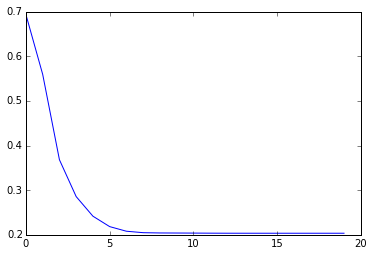

In [6]:
theta, theta_i = fmin_bfgs(costFunction,inTheta,fprime = gradient,args=(X,y),retall = 1, disp = 0)

J = zeros(len(theta_i))
for i,th in enumerate(theta_i):
    J[i] = costFunction(th,X,y)  
plot(J)


print 'The optimize values for Theta are: %s '%theta

acc = accuracy(theta,X,y)
print 'The Accuracy of the algorithm is: %f' %acc


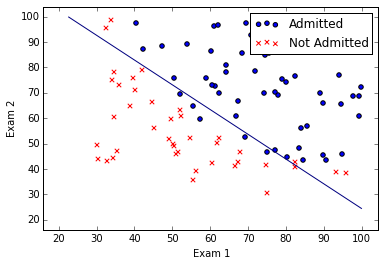

In [7]:
#Plot classification line

x1 = linspace(20,100,100)
x2 = linspace(20,100,100)

J = empty((100,100))
for i,iv in enumerate(x1):
    for j,jv in enumerate(x2):
        xa = array([iv,jv])
        J[i,j]=prediction(theta,xa,mu,sigma)

#Plot boundary for admission and non-admission elements
contour(x1,x2,J,[.5])
scatter(x[pos,0],x[pos,1], marker = 'o', c = 'b')
scatter(x[neg,0],x[neg,1], marker = 'x', c = 'r')
xlabel('Exam 1')
ylabel('Exam 2')
legend(['Admitted','Not Admitted'])

In [8]:
#Make an specific prediction
exam1 = 45
exam2 = 85

inp = array([exam1,exam2])
pred = prediction(theta,inp,mu,sigma)

print 'For grades Exam 1: %d and Exam 2: %d, the probability of admission is: %f' %(exam1,exam2,pred)

For grades Exam 1: 45 and Exam 2: 85, the probability of admission is: 0.776247
